# EDA

In [2]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


In [3]:
# List of datasets (based on the filiters in the proposal)
df_list = ['LT009.csv', 'LT010.csv', 'LT011.csv', 
            'LT012.csv', 'LT014.csv', 'LT016.csv', 'LT017.csv', 
            'LT018.csv', 'LT021.csv', 'SMB001.csv', 'SMB002.csv', 
            'SMB005.csv', 'SMB006.csv', 'SMB007.csv',
            'SMB011.csv', 'SMB012.csv']

In [4]:
# Load all datasets into a dictionary
dataframes = {}
for dataset in df_list:
    var_name = dataset.replace(".csv", "")
    dataframes[var_name] = pd.read_csv(dataset)

In [43]:
# Combine all datasets into one DataFrame
df = pd.concat(dataframes.values(), ignore_index=True)

In [6]:
# Display the first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Basic statistics
print(df.describe())

# Check the distribution of species
print(df['species'].value_counts())

  fishNum  dateSample        dateTimeSample dateProcessed    species  spCode  \
0   LT009  2022-07-26  2022-07-26T10:56:00Z    2022-07-26  lakeTrout      81   
1   LT009  2022-07-26  2022-07-26T10:56:00Z    2022-07-26  lakeTrout      81   
2   LT009  2022-07-26  2022-07-26T10:56:00Z    2022-07-26  lakeTrout      81   
3   LT009  2022-07-26  2022-07-26T10:56:00Z    2022-07-26  lakeTrout      81   
4   LT009  2022-07-26  2022-07-26T10:56:00Z    2022-07-26  lakeTrout      81   

   totalLength  forkLength  weight  girth  ...     F255.5       F256  \
0          521         474    1132    236  ... -34.081596 -33.939062   
1          521         474    1132    236  ... -37.477771 -38.291024   
2          521         474    1132    236  ... -39.601506 -47.631764   
3          521         474    1132    236  ... -46.987472 -47.106942   
4          521         474    1132    236  ... -39.616575 -40.659007   

      F256.5       F257     F257.5       F258     F258.5       F259  \
0 -34.633850 -3

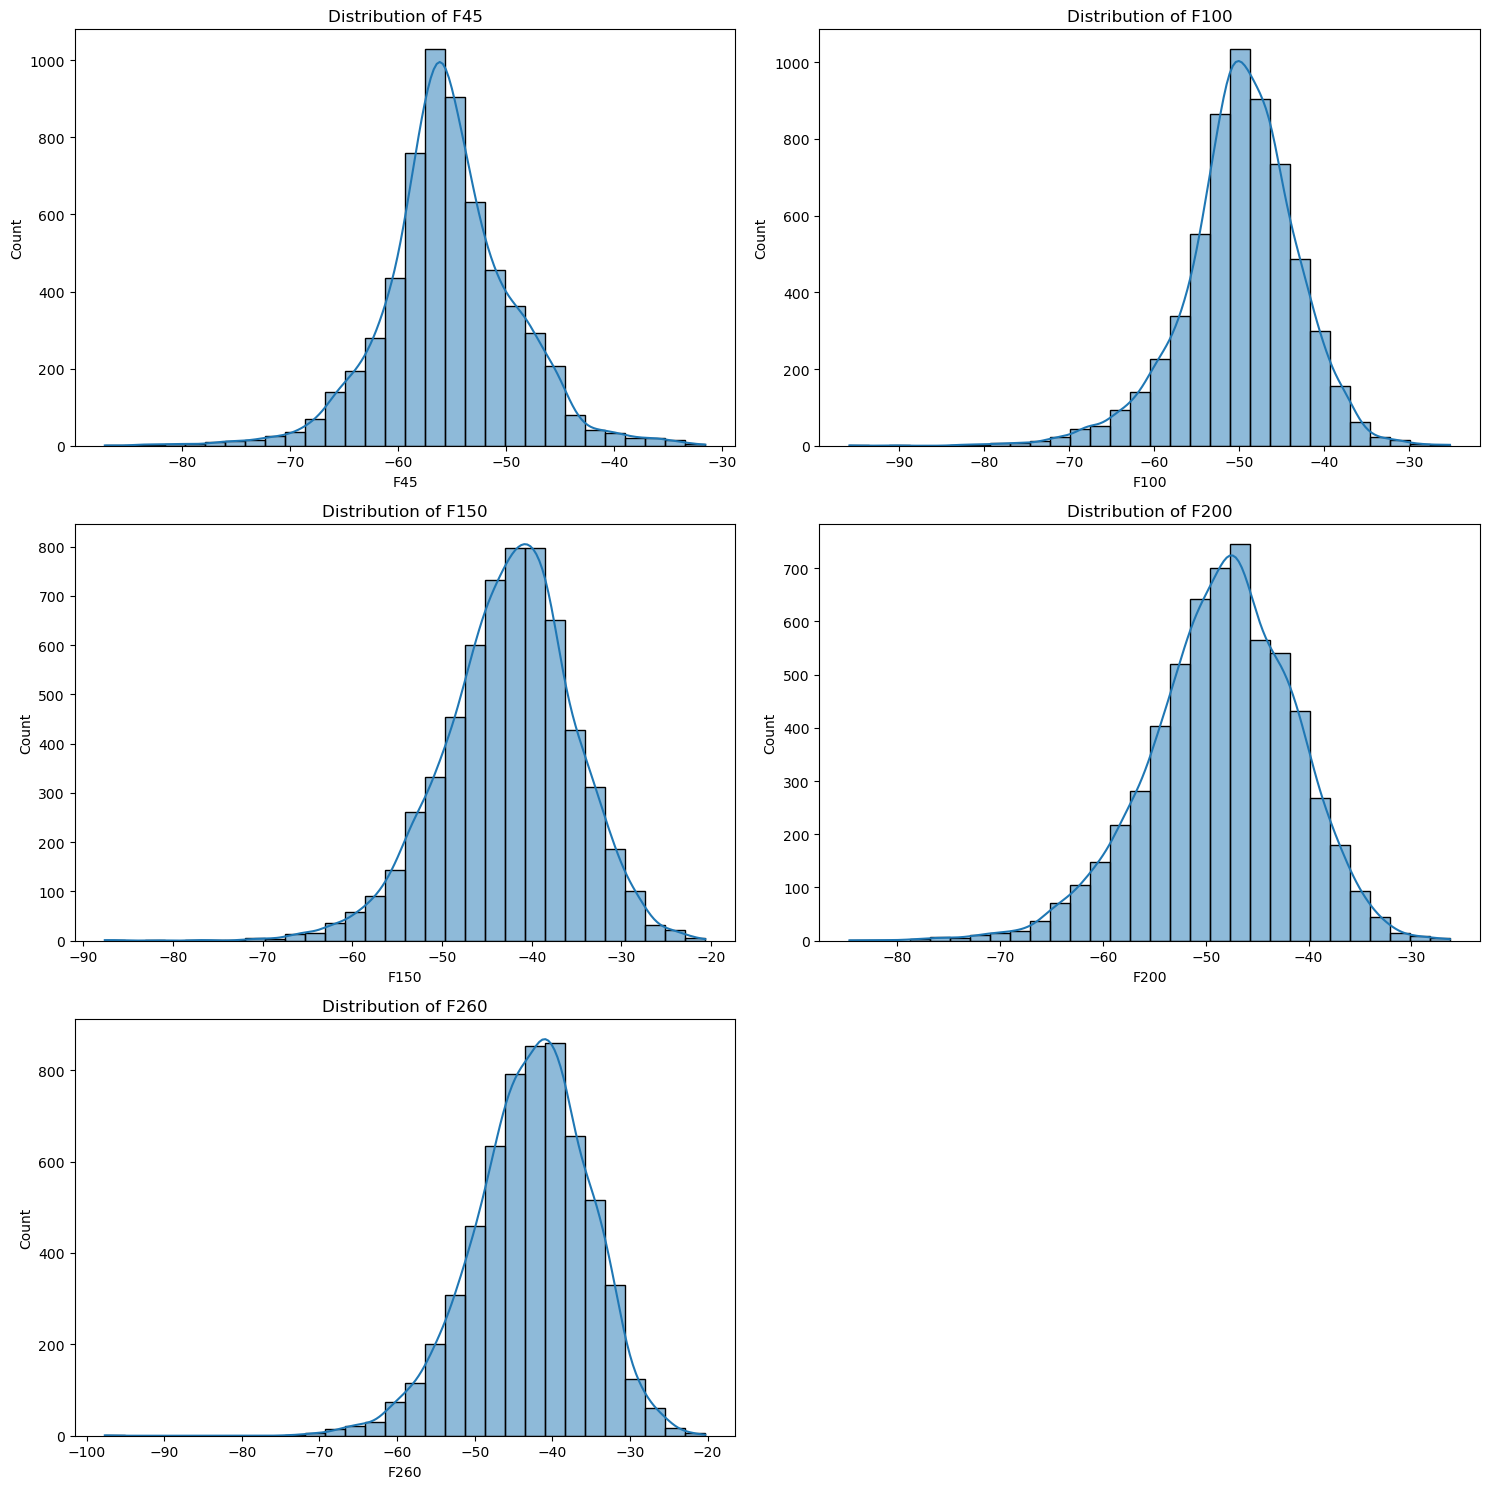

In [96]:
# Plot histograms for a few frequencies (e.g., F45, F100, F200)
plt.figure(figsize=(15, 15))
for i, freq in enumerate(['F45', 'F100', 'F150', 'F200', 'F260']):
    plt.subplot(3, 2, i+1)
    sns.histplot(df[freq], kde=True, bins=30)
    plt.title(f'Distribution of {freq}')
plt.tight_layout()
plt.show()

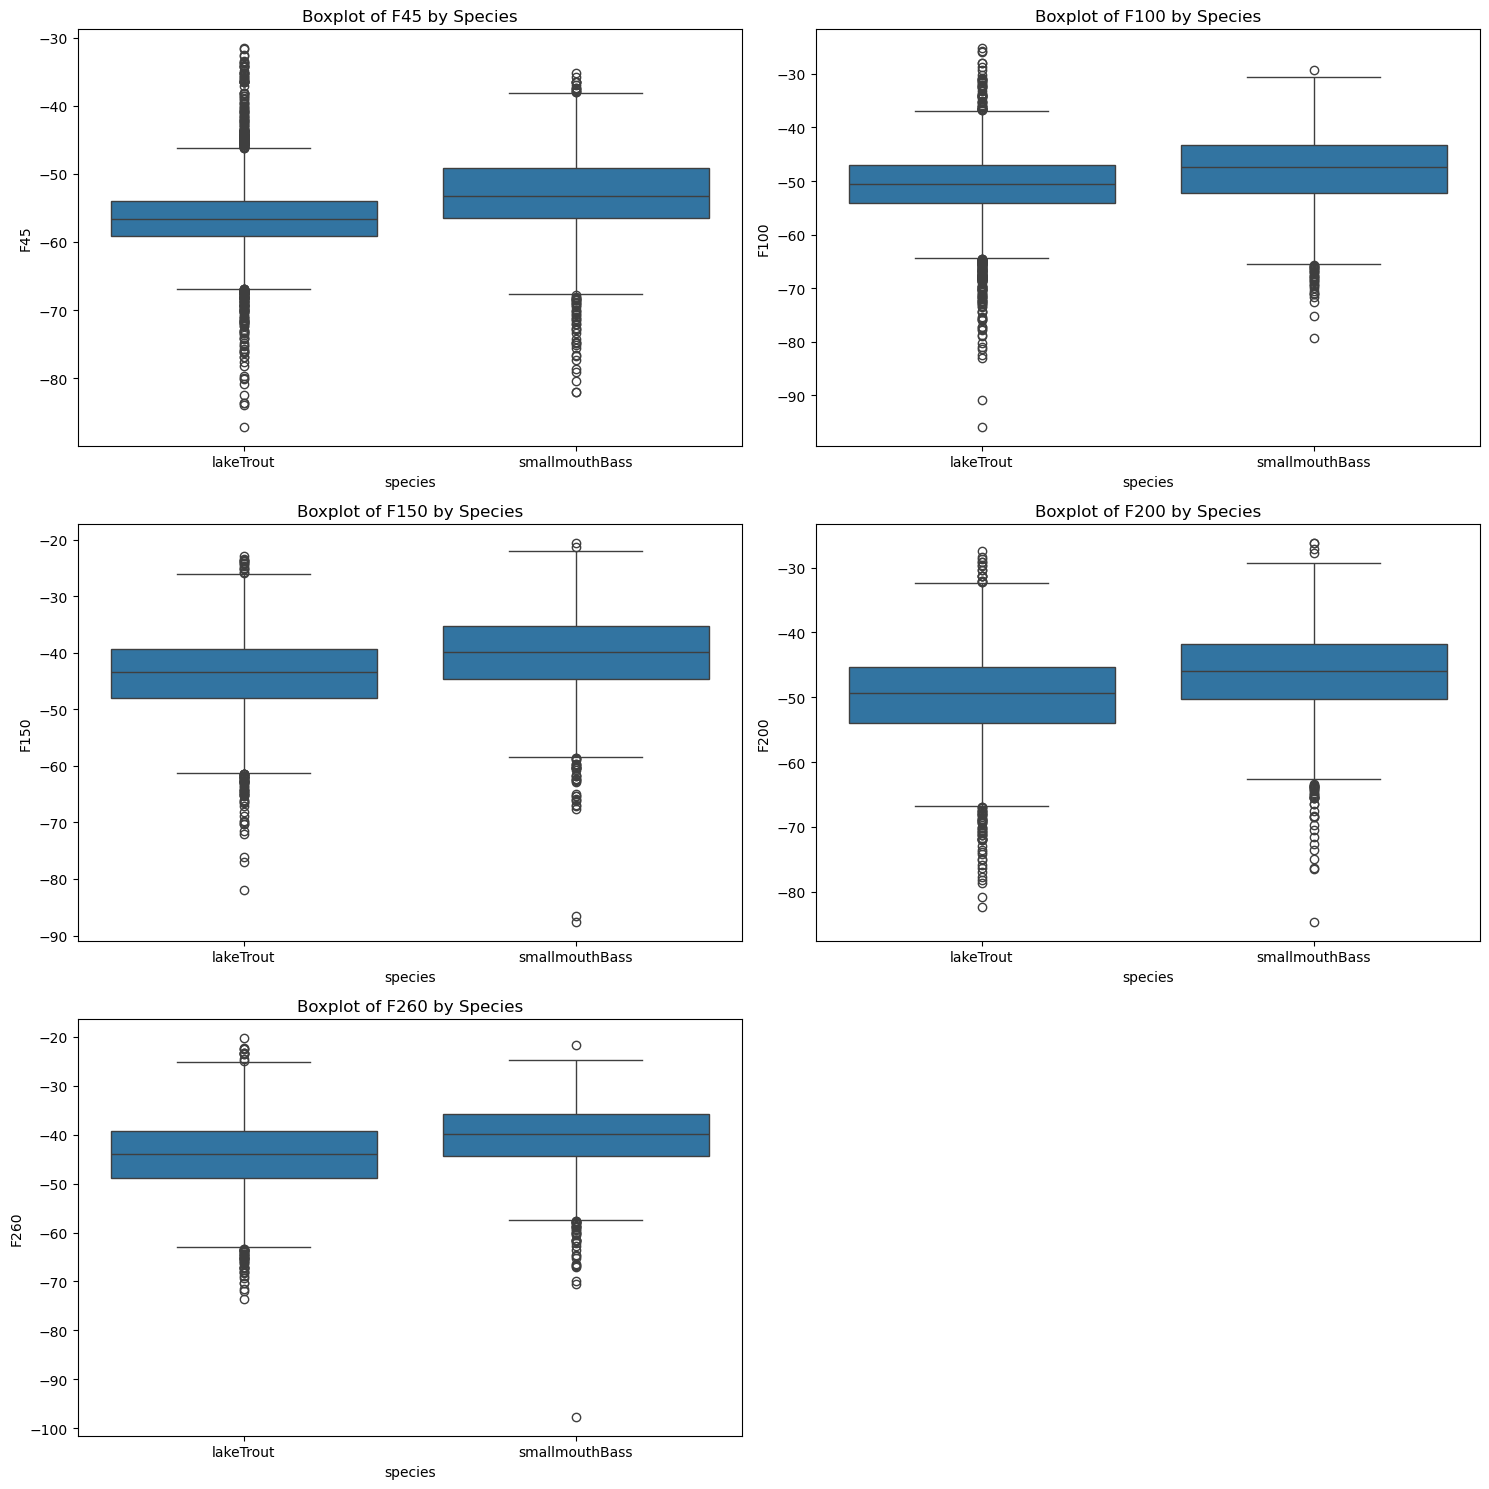

In [ ]:
# Plot boxplots for a few frequencies (e.g., F45, F100, F200)
plt.figure(figsize=(15, 15))
for i, freq in enumerate(['F45', 'F100', 'F150', 'F200', 'F260']):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x='species', y=freq, data=df)
    plt.title(f'Boxplot of {freq} by Species')
plt.tight_layout()
plt.show()

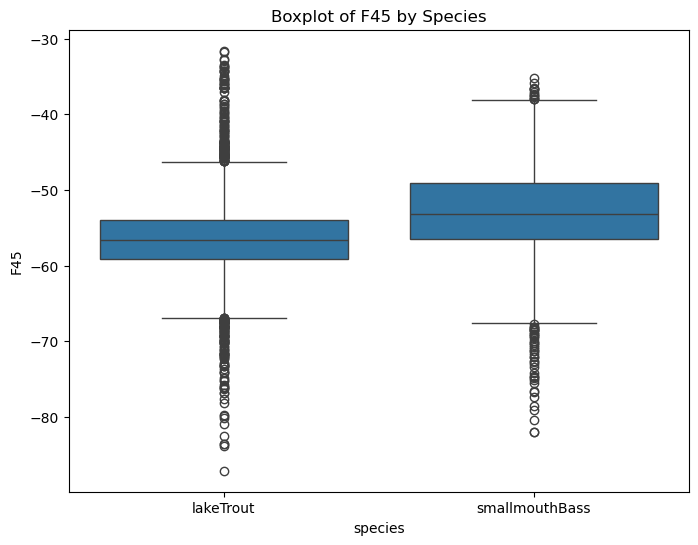

In [ ]:
# Boxplot for F45 by species
plt.figure(figsize=(8, 6))
sns.boxplot(x='species', y='F45', data=df)
plt.title('Boxplot of F45 by Species')
plt.show()

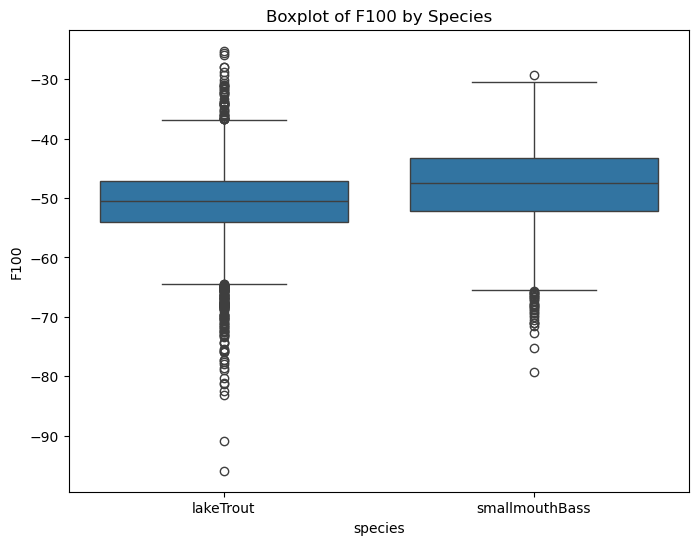

In [95]:
# Boxplot for F45 by species
plt.figure(figsize=(8, 6))
sns.boxplot(x='species', y='F100', data=df)
plt.title('Boxplot of F100 by Species')
plt.show()

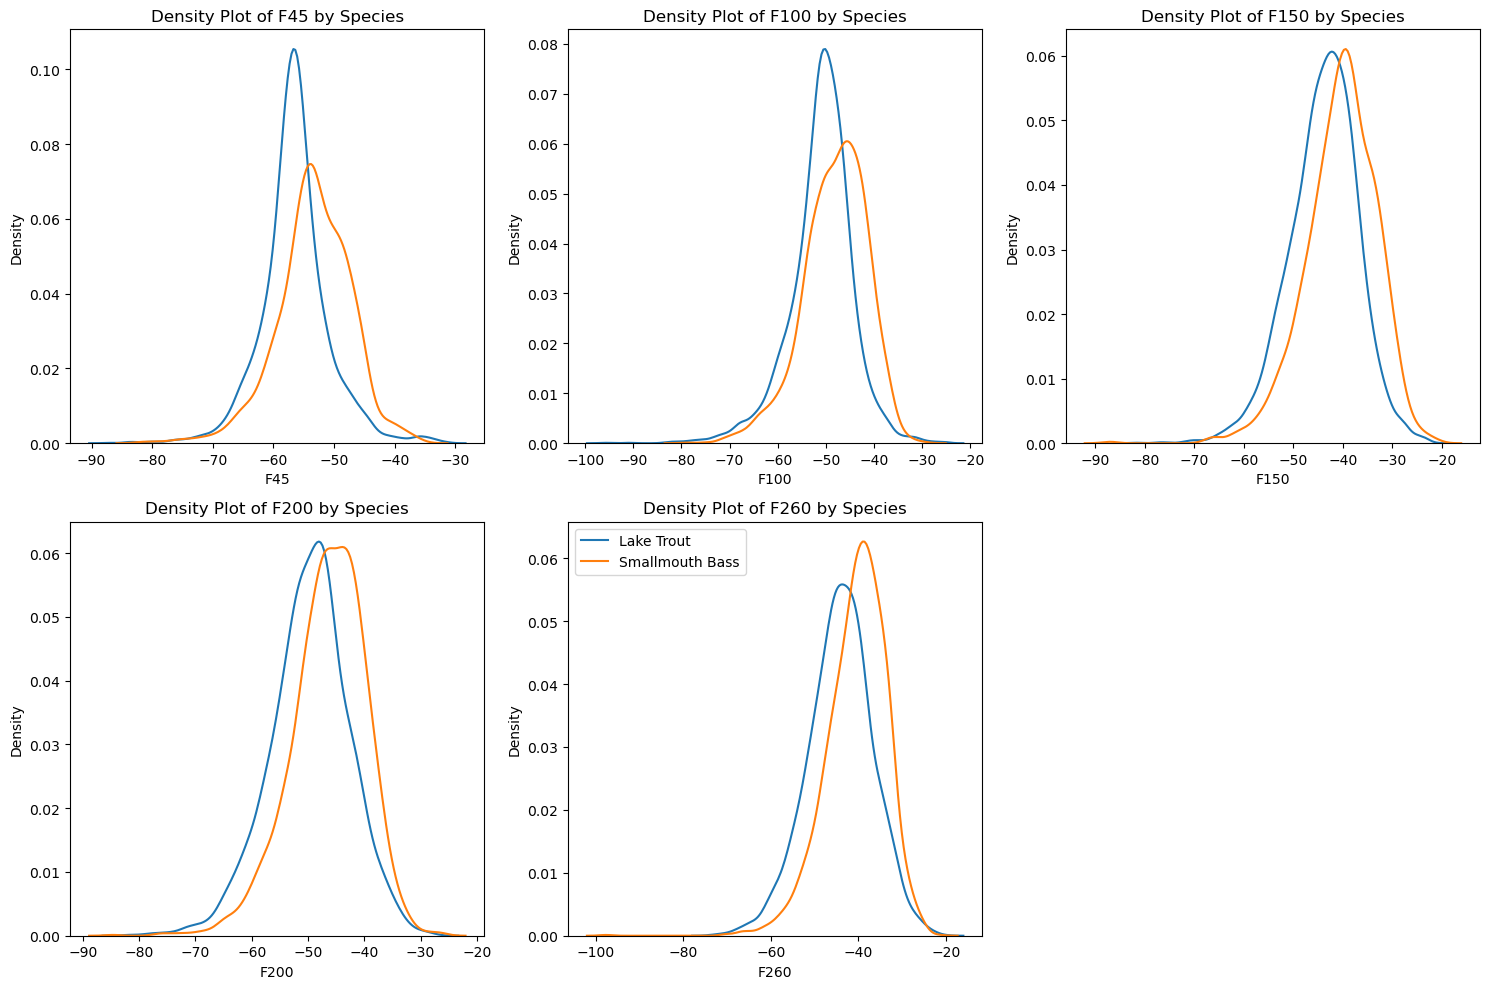

In [101]:
# Plot density plots for a few frequencies (e.g., F45, F100, F200) by species
plt.figure(figsize=(15, 10))
for i, freq in enumerate(['F45', 'F100', 'F150', 'F200', 'F260']):
    plt.subplot(2, 3, i+1)
    sns.kdeplot(df[df['species'] == 'lakeTrout'][freq], label='Lake Trout')
    sns.kdeplot(df[df['species'] == 'smallmouthBass'][freq], label='Smallmouth Bass')
    plt.title(f'Density Plot of {freq} by Species')
plt.tight_layout()
plt.legend()
plt.show()


In [10]:
print(df.columns.tolist())

['fishNum', 'dateSample', 'dateTimeSample', 'dateProcessed', 'species', 'spCode', 'totalLength', 'forkLength', 'weight', 'girth', 'dorsoLatHeight', 'clipTag', 'sex', 'mat', 'airbladderTotalLength', 'airBladderWidth', 'airbladderWeight', 'airBladderWeightCond', 'agingStructure', 'tissueSample', 'Region_name', 'FishTrack', 'MaxTSdiff', 'Ping_time', 'deltaRange', 'deltaMinAng', 'deltaMajAng', 'aspectAngle', 'Target_range', 'Angle_minor_axis', 'Angle_major_axis', 'Distance_minor_axis', 'Distance_major_axis', 'StandDev_Angles_Minor_Axis', 'StandDev_Angles_Major_Axis', 'Target_true_depth', 'pingNumber', 'Ping_S', 'Ping_E', 'Num_targets', 'TS_mean', 'Target_range_mean', 'Speed_4D_mean_unsmoothed', 'Fish_track_change_in_range', 'Time_in_beam', 'Distance_3D_unsmoothed', 'Thickness_mean', 'Exclude_below_line_range_mean', 'Target_depth_mean', 'Target_depth_max', 'Target_depth_min', 'Fish_track_change_in_depth', 'Region_bottom_altitude_min', 'Region_bottom_altitude_max', 'Region_bottom_altitude_me

In [44]:

# Convert 'dateProcessed' to proper datetime
df["dateProcessed"] = pd.to_datetime(df["dateProcessed"])

# Convert 'Ping_time' to a time format
df["Ping_time"] = pd.to_datetime(df["Ping_time"].str.strip(), format="%H:%M:%S.%f").dt.time

# Merge dateProcessed (date) and Ping_time (time) into one datetime column
df["Ping_time"] = df.apply(lambda row: pd.Timestamp.combine(row["dateProcessed"], row["Ping_time"]), axis=1)

# Verify output
print(df[["dateProcessed", "Ping_time"]])

     dateProcessed               Ping_time
0       2022-07-26 2022-07-26 15:01:17.016
1       2022-07-26 2022-07-26 15:01:17.220
2       2022-07-26 2022-07-26 15:01:19.119
3       2022-07-26 2022-07-26 15:01:19.220
4       2022-07-26 2022-07-26 15:04:37.217
...            ...                     ...
6080    2022-07-28 2022-07-28 00:17:22.964
6081    2022-07-28 2022-07-28 00:17:25.964
6082    2022-07-28 2022-07-28 00:17:26.163
6083    2022-07-28 2022-07-28 00:17:40.564
6084    2022-07-28 2022-07-28 00:17:40.764

[6085 rows x 2 columns]


In [102]:
# Filter for the specific fish (e.g., LT009)
df_LT009 = df[df['fishNum'] == 'LT009']

# Create the interactive plot
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_LT009['Ping_time'], 
    y=df_LT009['F45'], 
    mode='markers',  # Markers help visualize missing points
    name='F45',
    connectgaps=False,  # Ensures missing time points are NOT connected
    hoverinfo="skip",  # Disable default hover
    hovertemplate="Time: %{x|%H:%M:%S.%f}<br>F45: %{y}<extra></extra>"  # Custom hover format
))

# Add interactive time slider and range selector
fig.update_layout(
    title="F45 Over Time for LT009",
    xaxis_title="Time",
    yaxis_title="F45 Response",
    xaxis=dict(
        rangeselector=dict(
            buttons=[
                dict(count=10, label="10 mins", step="minute", stepmode="backward"),
                dict(count=30, label="30 mins", step="minute", stepmode="backward"),
                dict(step="all")
            ]
        ),
        rangeslider=dict(visible=True),  # Interactive sliding window
        type="date"
    ),
    template="plotly_white"
)
# Show the figure
fig.show()

In [103]:
# Filter for the specific fish (e.g., SMB001)
df_SMB001 = df[df['fishNum'] == 'SMB001']

# Create the interactive plot
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_SMB001['Ping_time'], 
    y=df_SMB001['F45'], 
    mode='markers',  # Markers help visualize missing points
    name='F45',
    connectgaps=False,  # Ensures missing time points are NOT connected
    hoverinfo="skip",  # Disable default hover
    hovertemplate="Time: %{x|%H:%M:%S.%f}<br>F45: %{y}<extra></extra>"  # Custom hover format
))

# Add interactive time slider and range selector
fig.update_layout(
    title="F45 Over Time for SMB001",
    xaxis_title="Time",
    yaxis_title="F45 Response",
    xaxis=dict(
        rangeselector=dict(
            buttons=[
                dict(count=10, label="10 mins", step="minute", stepmode="backward"),
                dict(count=30, label="30 mins", step="minute", stepmode="backward"),
                dict(step="all")
            ]
        ),
        rangeslider=dict(visible=True),  # Interactive sliding window
        type="date"
    ),
    template="plotly_white"
)
# Show the figure
fig.show()

In [47]:
import re

# Example list of column names
columns = df.columns.tolist()

# Use regex to find columns starting with 'F' followed by numbers
f_columns = [col for col in columns if re.match(r"^F\d+(\.\d+)?$", col)]

# Print the result
print(f_columns)


['F45', 'F45.5', 'F46', 'F46.5', 'F47', 'F47.5', 'F48', 'F48.5', 'F49', 'F49.5', 'F50', 'F50.5', 'F51', 'F51.5', 'F52', 'F52.5', 'F53', 'F53.5', 'F54', 'F54.5', 'F55', 'F55.5', 'F56', 'F56.5', 'F57', 'F57.5', 'F58', 'F58.5', 'F59', 'F59.5', 'F60', 'F60.5', 'F61', 'F61.5', 'F62', 'F62.5', 'F63', 'F63.5', 'F64', 'F64.5', 'F65', 'F65.5', 'F66', 'F66.5', 'F67', 'F67.5', 'F68', 'F68.5', 'F69', 'F69.5', 'F70', 'F70.5', 'F71', 'F71.5', 'F72', 'F72.5', 'F73', 'F73.5', 'F74', 'F74.5', 'F75', 'F75.5', 'F76', 'F76.5', 'F77', 'F77.5', 'F78', 'F78.5', 'F79', 'F79.5', 'F80', 'F80.5', 'F81', 'F81.5', 'F82', 'F82.5', 'F83', 'F83.5', 'F84', 'F84.5', 'F85', 'F85.5', 'F86', 'F86.5', 'F87', 'F87.5', 'F88', 'F88.5', 'F89', 'F89.5', 'F90', 'F90.5', 'F91', 'F91.5', 'F92', 'F92.5', 'F93', 'F93.5', 'F94', 'F94.5', 'F95', 'F95.5', 'F96', 'F96.5', 'F97', 'F97.5', 'F98', 'F98.5', 'F99', 'F99.5', 'F100', 'F100.5', 'F101', 'F101.5', 'F102', 'F102.5', 'F103', 'F103.5', 'F104', 'F104.5', 'F105', 'F105.5', 'F106', 'F1

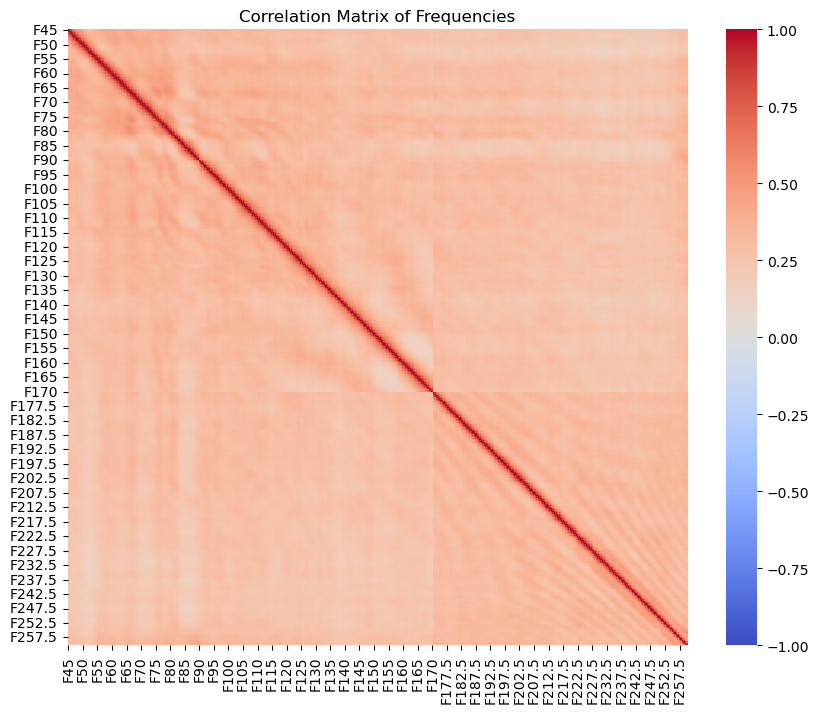

In [63]:
# Compute the correlation matrix
corr_matrix = df[f_columns].corr().fillna(0)  # Fill NaNs if any

# Plot the heatmap with correct color scaling
plt.figure(figsize=(10, 8))
plt.style.use('default')  # Ensure no grayscale styles are applied
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)  # Force correct color scaling
plt.title('Correlation Matrix of Frequencies')
plt.show()

In [67]:
# Split the dataset by species
lt_df = df[df['species'] == 'lakeTrout']
smb_df = df[df['species'] == 'smallmouthBass']

# Check the size of each dataset
print(f"Lake Trout dataset size: {lt_df.shape}")
print(f"Smallmouth Bass dataset size: {smb_df.shape}")

Lake Trout dataset size: (3828, 484)
Smallmouth Bass dataset size: (2257, 484)


        Lake Trout  Smallmouth Bass
F45     -56.490225       -53.302915
F45.5   -56.244414       -53.013019
F46     -56.064421       -52.730495
F46.5   -55.753755       -52.259890
F47     -55.807013       -52.095333
...            ...              ...
F258    -42.646562       -39.499465
F258.5  -42.949598       -39.539405
F259    -43.211695       -39.661469
F259.5  -43.725793       -40.155230
F260    -44.149846       -40.459719

[426 rows x 2 columns]


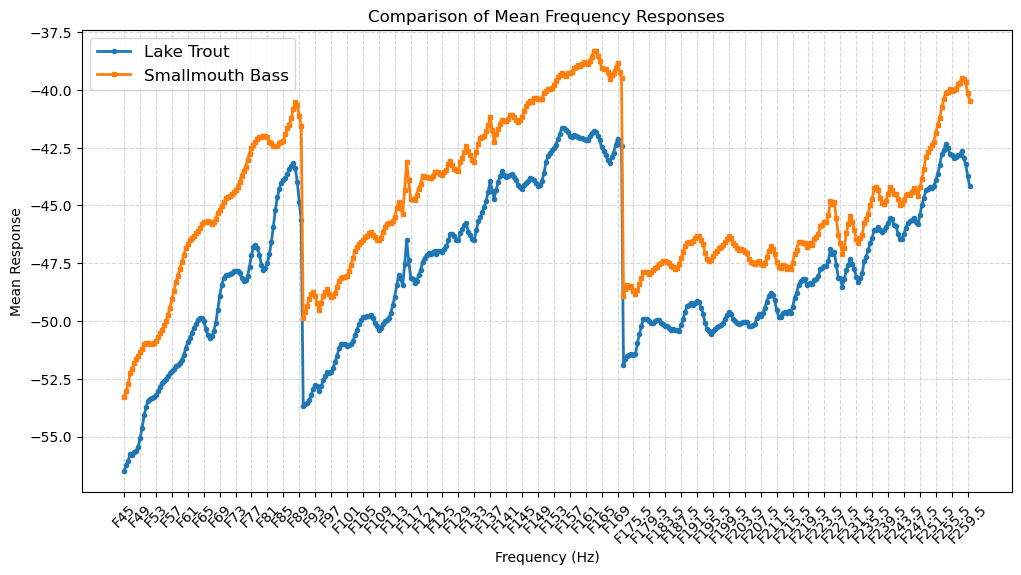

In [73]:
# Compare mean frequency responses
lt_mean = lt_df[f_columns].mean()  # Assuming frequencies start from column 4
smb_mean = smb_df[f_columns].mean()

# Create a DataFrame for comparison
mean_comparison = pd.DataFrame({'Lake Trout': lt_mean, 'Smallmouth Bass': smb_mean})
print(mean_comparison)

# Define figure size
plt.figure(figsize=(12, 6))

# Reduce markers (plot every nth point to avoid clutter)
n = max(1, len(mean_comparison) // 50)  # Adjust dynamically

# Plot mean frequency responses
plt.plot(mean_comparison.index, mean_comparison['Lake Trout'], label="Lake Trout", marker='o', markersize=3, linestyle='-', linewidth=2)
plt.plot(mean_comparison.index, mean_comparison['Smallmouth Bass'], label="Smallmouth Bass", marker='s', markersize=3, linestyle='-', linewidth=2)

# Formatting improvements
plt.xlabel("Frequency (Hz)")
plt.ylabel("Mean Response")
plt.title("Comparison of Mean Frequency Responses")

# Reduce x-axis ticks for readability
plt.xticks(mean_comparison.index[::n], rotation=45, fontsize=10)  # Plot every nth tick

# Use a less intense grid
plt.grid(True, linestyle="--", alpha=0.5)

# Add a legend with better styling
plt.legend(frameon=True, loc="upper left", fontsize=12)

# Show plot
plt.show()

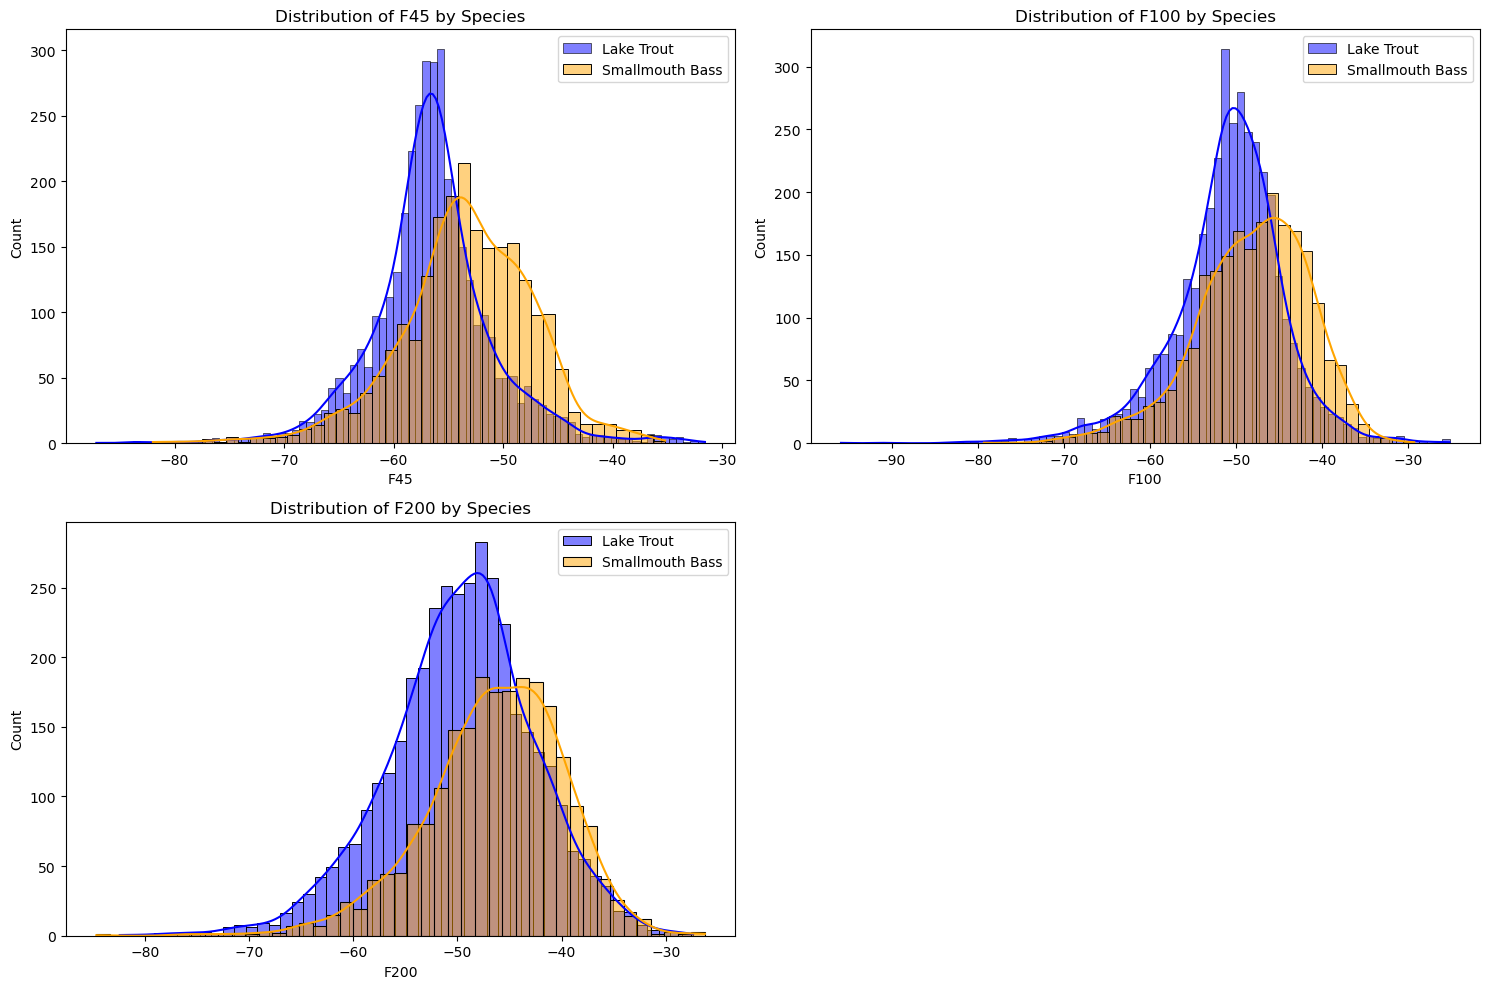

In [74]:
# Plot histograms for a few frequencies (e.g., F45, F100, F200)
frequencies = ['F45', 'F100', 'F200']

plt.figure(figsize=(15, 10))
for i, freq in enumerate(frequencies):
    plt.subplot(2, 2, i+1)
    sns.histplot(lt_df[freq], kde=True, color='blue', label='Lake Trout')
    sns.histplot(smb_df[freq], kde=True, color='orange', label='Smallmouth Bass')
    plt.title(f'Distribution of {freq} by Species')
    plt.legend()
plt.tight_layout()
plt.show()

/var/folders/46/_qfvxk655mzdxw5h9v4z7ybw0000gn/T/ipykernel_54629/27757218.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




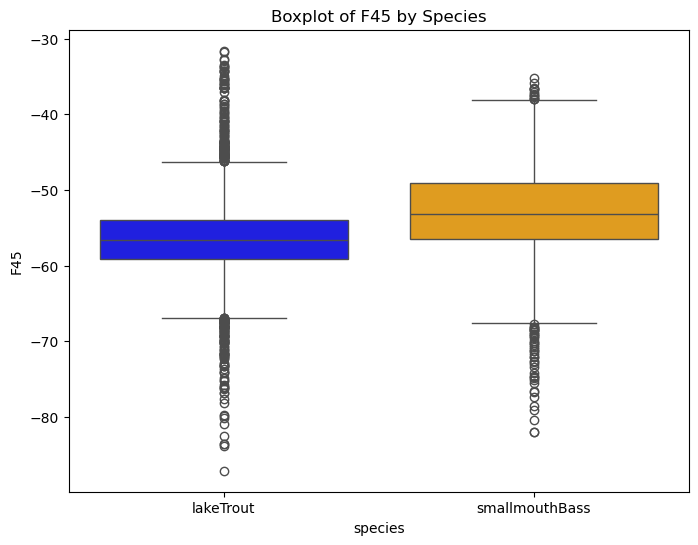

In [76]:
# Boxplot for F45 by species
plt.figure(figsize=(8, 6))
sns.boxplot(x='species', y='F45', data=df, palette=['blue', 'orange'])
plt.title('Boxplot of F45 by Species')
plt.show()

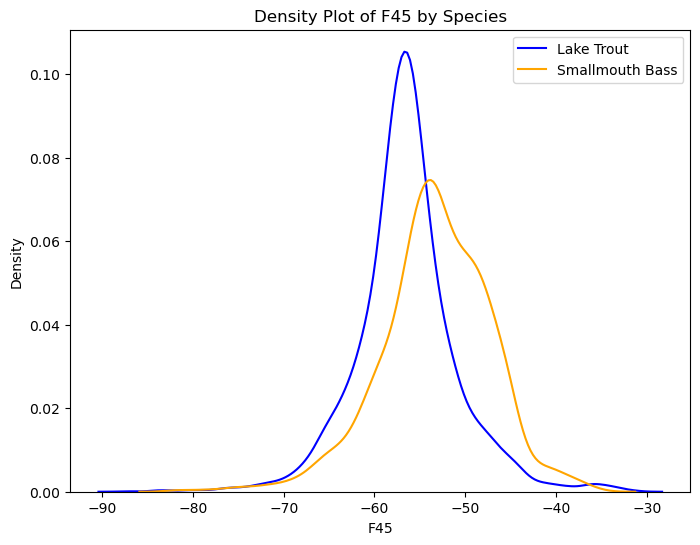

In [77]:
# Density plots for F45 by species
plt.figure(figsize=(8, 6))
sns.kdeplot(lt_df['F45'], label='Lake Trout', color='blue')
sns.kdeplot(smb_df['F45'], label='Smallmouth Bass', color='orange')
plt.title('Density Plot of F45 by Species')
plt.legend()
plt.show()

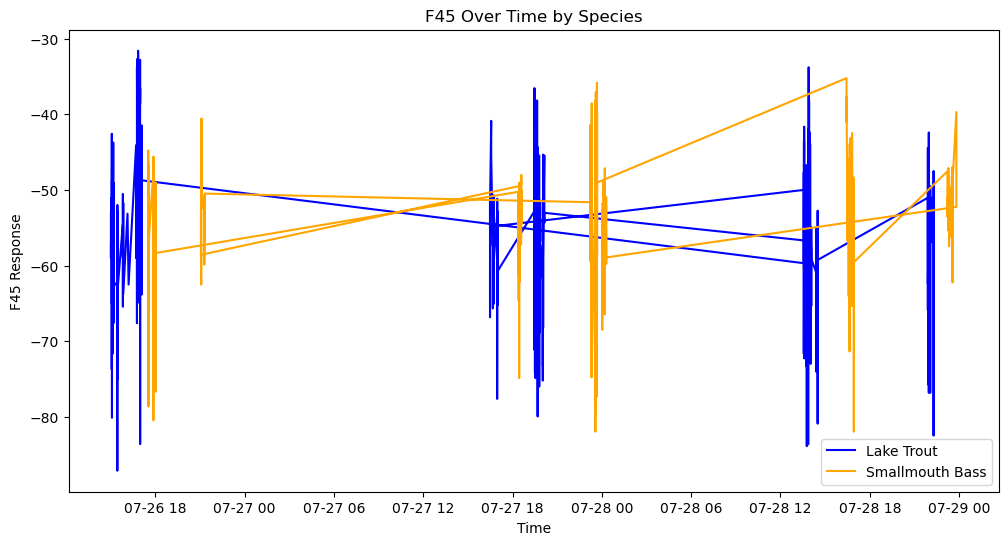

In [78]:
# Plot F45 over time for both species
plt.figure(figsize=(12, 6))
plt.plot(lt_df['Ping_time'], lt_df['F45'], label='Lake Trout', color='blue')
plt.plot(smb_df['Ping_time'], smb_df['F45'], label='Smallmouth Bass', color='orange')
plt.title('F45 Over Time by Species')
plt.xlabel('Time')
plt.ylabel('F45 Response')
plt.legend()
plt.show()

In [84]:
# Merge both datasets for classification
X = pd.concat([lt_df[f_columns], smb_df[f_columns]], axis=0)
y = pd.concat([lt_df['species'], smb_df['species']], axis=0)

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Feature Importances
importances = model.feature_importances_
feature_names = X.columns


/var/folders/46/_qfvxk655mzdxw5h9v4z7ybw0000gn/T/ipykernel_54629/3877114549.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




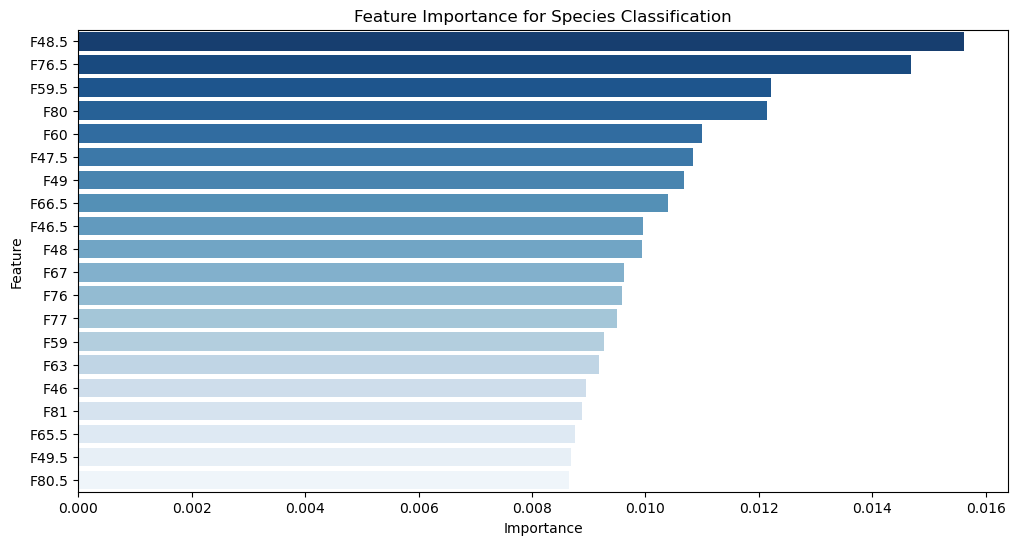

In [88]:
# Create DataFrame for Feature Importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort Features by Importance
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Plot Feature Importance
plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance_df[:20], x="Importance", y="Feature", palette="Blues_r")
plt.title('Feature Importance for Species Classification')
plt.show()
